**Imports**

In [271]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import fbeta_score


Import datasets

In [272]:
input_file = "/content/X_train.csv"
X = pd.read_csv(input_file,  na_values="na")
input_file = "/content/y_train.csv"
Y = pd.read_csv(input_file, na_values="na")
input_file = "/content/X_test.csv"
X_pred = pd.read_csv(input_file,na_values="na")
print("X_train shape: " , X.shape)
print("Y_train shape: " ,Y.shape)
print("X_test shape: " ,X_pred.shape)

X_train shape:  (39900, 171)
Y_train shape:  (39900, 2)
X_test shape:  (17100, 171)


In [273]:
print(X.head())

   Id  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   0   21470     0.0  2.130706e+09   168.0     0.0     0.0     0.0     0.0   
1   1   40856     NaN  5.540000e+02     0.0     0.0     0.0     0.0     0.0   
2   2      28     NaN  2.130706e+09    20.0     0.0     0.0     0.0     0.0   
3   3   38682     NaN  3.440000e+02   326.0     0.0     0.0     0.0     0.0   
4   4   62218     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  187028.0  109090.0  228040.0   89664.0  296964.0   78936.0   
1     0.0  ...  526386.0  277000.0  612436.0  441664.0   84968.0    2204.0   
2     0.0  ...     406.0      80.0      78.0      40.0       0.0       0.0   
3     0.0  ...  244622.0  116794.0  267896.0  307242.0  248998.0  164098.0   
4     0.0  ...  499450.0  242448.0  458620.0  422742.0  390678.0  287052.0   

     ee_008   ee_009  ef_000  eg_000  
0      58.0      

Ditribution of the values

In [274]:
s = pd.Series(Y["Expected"])
s.value_counts(normalize=False)

0    39178
1      722
Name: Expected, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


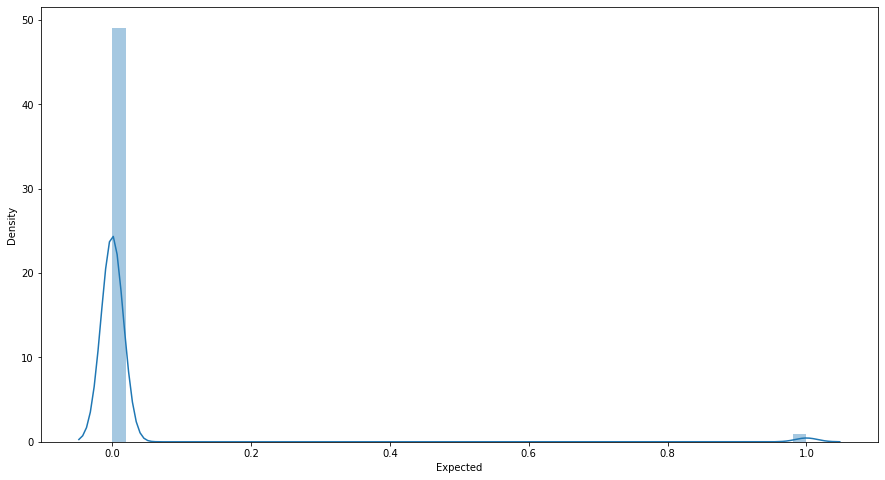

In [275]:
plt.figure(figsize=(15,8))
sns.distplot(Y["Expected"]);

In [276]:
total_miss_values=X.isna().sum().sort_values(ascending=False)
total_miss_values

br_000    32723
bq_000    32367
bp_000    31718
ab_000    30779
cr_000    30779
          ...  
cj_000      226
ci_000      226
bt_000       94
aa_000        0
Id            0
Length: 171, dtype: int64

In [277]:
print (X.describe())

                 Id        aa_000       ab_000        ac_000        ad_000  \
count  39900.000000  3.990000e+04  9121.000000  3.765900e+04  2.993400e+04   
mean   19949.500000  6.094339e+04     0.728210  3.536753e+08  2.872309e+05   
std    11518.282207  2.598214e+05     3.107561  7.927850e+08  4.961607e+07   
min        0.000000  0.000000e+00     0.000000  0.000000e+00  0.000000e+00   
25%     9974.750000  8.680000e+02     0.000000  1.600000e+01  2.400000e+01   
50%    19949.500000  3.082300e+04     0.000000  1.520000e+02  1.260000e+02   
75%    29924.250000  4.889650e+04     0.000000  9.700000e+02  4.340000e+02   
max    39899.000000  4.294967e+07   134.000000  2.130707e+09  8.584298e+09   

             ae_000        af_000        ag_000        ag_001        ag_002  \
count  38240.000000  38240.000000  3.943400e+04  3.943400e+04  3.943400e+04   
mean       6.427877     10.552354  2.017626e+02  1.096192e+03  9.547083e+03   
std      112.420166    177.143548  1.823295e+04  3.272456e+0

In [278]:
data = pd.merge(Y,X)
x = data.drop(['Id'], axis =1)

In [279]:
#perc = 50.0 
#min_count = int(((100-perc)/100)*x.shape[0] + 1)
#X = pd.merge(Y,X)
#x = x.dropna( axis=1, thresh=min_count)


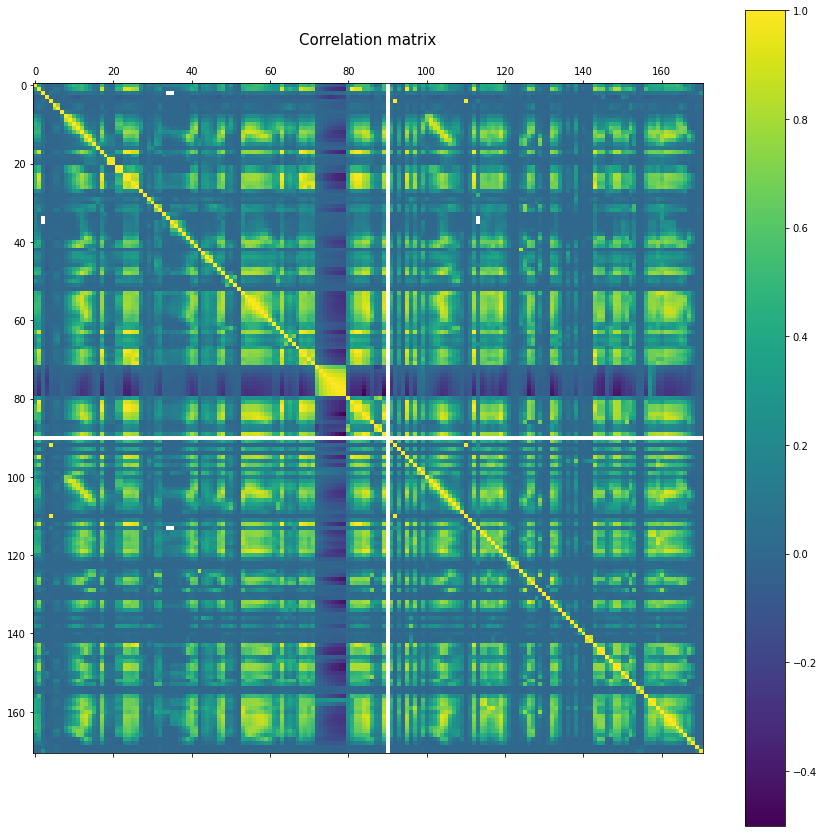

In [280]:
f=plt.figure(figsize=(15,15))
ax=f.add_subplot(111)
cax=ax.matshow(x.corr(),interpolation='nearest')
f.colorbar(cax)
plt.title('Correlation matrix',fontsize=15)
plt.show();

In [281]:
total_miss_values = x.isna().sum().sort_values(ascending=False)
percent_missing = x.isna().sum() * 100 / len(x)
missing_value_X = pd.DataFrame({'column_name': x.columns,
                                 'percent_missing': percent_missing})
missing_value_X.sort_values('percent_missing', inplace=True, ascending=False)
total_miss_values.head(10)
missing_value_X.head(10)

,column_name,percent_missing
br_000,br_000,82.012531
bq_000,bq_000,81.120301
bp_000,bp_000,79.493734
ab_000,ab_000,77.140351
cr_000,cr_000,77.140351
bo_000,bo_000,77.125313
bn_000,bn_000,73.190476
bm_000,bm_000,65.834586
bl_000,bl_000,45.436090
bk_000,bk_000,38.197995


In [282]:
x = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(x), columns=x.columns)
X_pred = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(X_pred), columns=x.columns)


In [283]:
X_pred=X_pred.drop(columns=["Expected"])
X_train=x.drop(columns=["Expected"])
y_train=x["Expected"]

In [284]:
pca50comp = PCA(50)
x_pca = pca50comp.fit(X_train).transform(X_train)
x_test_pca = pca50comp.transform(X_pred)

x_pca = pd.DataFrame(x_pca)
x_test_pca = pd.DataFrame(x_test_pca)

x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.796928e+09,2.154362e+06,16207.262541,-6.420076e+06,2.816369e+06,-1.366683e+06,1.059350e+05,-1.169605e+06,-1.035134e+06,902554.973104,...,-28089.062708,-225704.963003,-123884.490684,-305773.524122,-28269.952334,-59448.760765,122561.649719,117105.797594,292942.146885,278720.862764
1,-3.337823e+08,-5.858645e+06,-432727.477542,-8.703238e+06,-2.188168e+05,-1.114140e+06,-8.879440e+05,2.137344e+06,-9.278204e+04,809914.779287,...,223561.322608,-341236.946103,-249726.204474,-603047.183768,-347554.180858,88302.325564,76436.340090,11818.072354,-108508.385435,-7067.033805
2,1.796930e+09,-1.421159e+06,21523.463122,-8.243020e+06,7.912230e+06,-6.677783e+06,-2.101215e+06,1.494869e+06,-1.880791e+06,765942.683016,...,-271977.699276,198984.237168,111116.164803,221647.568048,-56485.195036,-28125.197192,6343.888867,-32582.895822,16141.112737,-38260.294194
3,-3.337591e+08,-6.044431e+06,-428755.485651,-1.018031e+07,2.505657e+06,3.085513e+06,8.163781e+05,-1.038524e+06,1.396422e+06,892910.126835,...,450287.433578,-123965.828316,-182768.804767,-246088.796767,153577.326401,-28547.703491,51129.546450,46099.731082,-78108.439234,-8527.558284
4,-3.337924e+08,-5.785929e+06,-436188.082235,-6.432243e+06,-3.677846e+05,-1.938865e+06,-1.703590e+06,1.939086e+06,-7.378004e+05,813308.127707,...,385347.231795,-289905.039457,-405233.725822,-459483.501251,-52700.660332,8165.036061,36893.369192,63370.447234,-97817.049341,46046.331562


In [285]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_train, test_size=0.33, random_state = 10)

In [286]:
oversample = SVMSMOTE(sampling_strategy='minority', random_state=None, k_neighbors=8, n_jobs=None)
X_train,y_train = oversample.fit_resample(X_train,y_train)

print("New shape :",X_train.shape,y_train.shape);

New shape : (52554, 50) (52554,)


In [287]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [288]:
from sklearn import preprocessing
from sklearn import utils

In [289]:
params={ 'num_leaves':145,
        'object':'binary',
        'metric':['auc','binary_logloss']
       }

In [290]:
#clf = svm.SVC()
#clf = clf.fit(X_train, y_train)

#from sklearn.naive_bayes import GaussianNB
#nb = GaussianNB()
#nb.fit(X_train, y_train)

#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(X_train, y_train)

#from sklearn import tree
#model = tree.DecisionTreeRegressor(criterion='poisson')
#model.fit(X_train, y_train)


#from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(p = 1, n_neighbors=(30), weights='distance')

#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(criterion = 'entropy', n_estimators = 500, bootstrap = True)

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("F3 score  ",fbeta_score(y_test, y_pred, average='binary', beta=3))

F3 score   0.807743658210948


In [291]:
y_test_tree1 = model.predict(x_test_pca)

dataset_dectree = pd.DataFrame({'Id':  np.arange(y_test_tree1.size), 'Predicted':y_test_tree1}, columns=['Id', 'Predicted'])
dataset_dectree["Predicted"] = dataset_dectree["Predicted"].astype(int)
dataset_dectree.to_csv('grad.csv', index=False)

In [292]:
print(sum(dataset_dectree["Predicted"]))

760
